In [35]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(r'C:\Users\offic\Dropbox\My PC (LAPTOP-5P66QLDI)\Desktop\Fruits360\train',
                                                 target_size = (100, 100),
                                                 batch_size = 32)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\offic\Dropbox\My PC (LAPTOP-5P66QLDI)\Desktop\Fruits360\test',
                                            target_size = (100, 100),
                                            batch_size = 32)


class_names = training_set.class_indices
class_names = {class_names[i]:i for i in class_names.keys()}
print(class_names)

train_imgs, labels = next(training_set)


Found 80 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
{0: 'Apple Braeburn', 1: 'Lemon Meyer', 2: 'Mango', 3: 'Raspberry'}


#### Convolution and Pooling

In [36]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', 
                               input_shape = (100,100, 3)))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

#### Flattening

In [37]:
cnn.add(tf.keras.layers.Flatten())

#### Full Connection

In [39]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

#### Output Layer

In [41]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

In [42]:
print(cnn.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 64)         

In [43]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = cnn.fit(training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 288ms/step - loss: 1.3836 - accuracy: 0.1875 - val_loss: 1.3786 - val_accuracy: 0.3250
Epoch 2/100
3/3 [==============================] - 1s 220ms/step - loss: 1.3678 - accuracy: 0.3125 - val_loss: 1.3632 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 1s 157ms/step - loss: 1.3532 - accuracy: 0.3500 - val_loss: 1.3037 - val_accuracy: 0.3250
Epoch 4/100
3/3 [==============================] - 1s 180ms/step - loss: 1.2737 - accuracy: 0.6000 - val_loss: 1.1485 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 1s 220ms/step - loss: 1.0974 - accuracy: 0.6625 - val_loss: 0.9709 - val_accuracy: 0.5250
Epoch 6/100
3/3 [==============================] - 1s 179ms/step - loss: 0.9244 - accuracy: 0.7000 - val_loss: 0.6404 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 1s 178ms/step - loss: 0.5923 - accuracy: 0.9000 - val_loss: 0.4287 - val_accuracy: 0.8750
Epoch 8/100
3

In [44]:
# list all data in history
print(history.history.keys())

#Evaluating the Model
model_history = history.history

loss_accuracy_train = cnn.evaluate(training_set)
print("Training Loss: {:.4f}".format(loss_accuracy_train[0]))
print("Training Accuracy: {:.2%}".format(loss_accuracy_train[1]))
loss_accuracy = cnn.evaluate(test_set)
print("Validation Loss: {:.4f}".format(loss_accuracy[0]))
print("Validation Accuracy: {:.2%}".format(loss_accuracy[1]))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
3/3 [==============================] - 0s 96ms/step - loss: 2.6998e-05 - accuracy: 1.0000
Training Loss: 0.0000
Training Accuracy: 100.00%
2/2 [==============================] - 0s 21ms/step - loss: 3.9914e-05 - accuracy: 1.0000
Validation Loss: 0.0000
Validation Accuracy: 100.00%


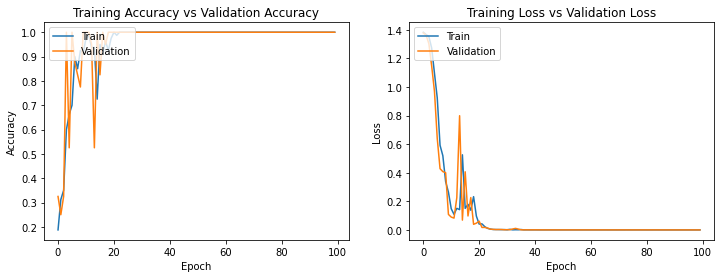

In [45]:
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Classification with CNN

In [16]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad


In [17]:

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))



In [18]:
# Keras Model
input_layer = tensorflow.keras.layers.Input(shape=(100, 100, 3))

#CONVOLUTION AND POOLING
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=10,
                                             kernel_size=7,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2),
                                                 strides=5)(conv_layer1)

conv_layer2 = tensorflow.keras.layers.Conv2D(filters=7,
                                             kernel_size=5,
                                             activation="relu")(max_pool1)

conv_layer3 = tensorflow.keras.layers.Conv2D(filters=4,
                                             kernel_size=3,
                                             activation="relu")(max_pool1)

conv_layer4 = tensorflow.keras.layers.Conv2D(filters=1,
                                             kernel_size=1,
                                             activation="relu")(max_pool1)

#FLATTENING
flatten_layer  = tensorflow.keras.layers.Flatten()(conv_layer2)

#DENSE LAYERING
dense_layer = tensorflow.keras.layers.Dense(15, activation="relu")(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(4, activation="softmax")(dense_layer)


model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)


In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 94, 94, 10)        1480      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 7)         1757      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1575)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                23640     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 64  

Generation = 1
Fitness    = 0.17688032179009738
Generation = 2
Fitness    = 0.17688032179009738
Generation = 3
Fitness    = 0.17688032179009738
Generation = 4
Fitness    = 0.17688032179009738
Generation = 5
Fitness    = 0.17688032179009738
Generation = 6
Fitness    = 0.17688032179009738
Generation = 7
Fitness    = 0.17688032179009738
Generation = 8
Fitness    = 0.17688032179009738
Generation = 9
Fitness    = 0.17688032179009738
Generation = 10
Fitness    = 0.17688032179009738
Generation = 11
Fitness    = 0.17688032179009738
Generation = 12
Fitness    = 0.17688032179009738
Generation = 13
Fitness    = 0.17688032179009738
Generation = 14
Fitness    = 0.17688032179009738
Generation = 15
Fitness    = 0.17726305031306802
Generation = 16
Fitness    = 0.17726305031306802
Generation = 17
Fitness    = 0.17726305031306802
Generation = 18
Fitness    = 0.17726305031306802
Generation = 19
Fitness    = 0.17726305031306802
Generation = 20
Fitness    = 0.2256075358072127
Generation = 21
Fitness    = 0

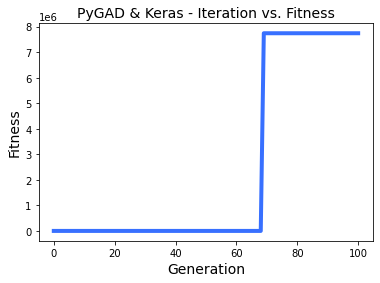

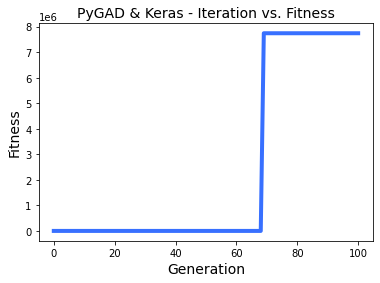

In [20]:
# Data inputs
data_inputs = numpy.load("dataset_inputs.npy")

# Data outputs
data_outputs = numpy.load("dataset_outputs.npy")
data_outputs = tensorflow.keras.utils.to_categorical(data_outputs)

num_generations = 100
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)



In [21]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)

print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')




Fitness value of the best solution = 7739380.763515218
Index of the best solution : 0
Predictions:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]


In [22]:
# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)

Categorical Crossentropy :  1.192093e-07
Accuracy :  1.0
